***
# Assignment 2 Social Graphs 2023

**Link to assignment description:** https://github.com/SocialComplexityLab/socialgraphs2023/blob/main/assignments/Assignment2.ipynb

This assignment applies the following formatting:

> Original assignment text is indented and 
> - tasks are in bullet point format.

**✅ Solution**: A solution is marked with a checkmark emoji.

**💬 Comment**: An additional comment uses a speech bubble emoji.
***

## Table of Contents
* [0. Building the network](#network)
* [1. Network visualization and basic stats](#network_stats)
    * [1.a Stats](#stats)
    * [1.b Visualization](#viz)
* [2. Word-clouds](#wordclouds)
* [3. Communities](#communities)
* [4. Sentiment of communities](#sentiment)
* [5. References](#references)

## Requirements <a class="anchor" id="requirements"></a>

In [13]:
from collections import Counter
from nltk import FreqDist
from nltk.corpus import stopwords, PlaintextCorpusReader
from nltk.stem import WordNetLemmatizer
from nltk.text import Text
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

import math
import matplotlib.pyplot as plt
import networkx as nx
import nltk
import os
import pandas as pd
import pickle as pkl
import re
import string

> ## 0. Building the network <a class="anchor" id="network"></a>
> To create our network, we downloaded the rapper Wiki pages from each coast (during Week 4) and linked them via the hyperlinks connecting pages to each other. To achieve this goal we have used regular expressions.
> 
> - Explain the strategy you have used to extract the hyperlinks from the Wiki-pages, assuming that you have already collected the rapper pages with the Wikipedia API.

> - Show the regular expressions you have built and explain in details how they work.

> ## 1. Network visualization and basic stats <a class="anchor" id="network_stats"></a>
> Visualize your network of rappers (from lecture 5) and calculate stats (from lecture 4 and 5). For this exercise, we assume that you have already generated the network and extracted the largest weakly connected component (the "largest weakly connected component" of a directed network is the subgraph consisting of the nodes that would constitute the largest connected component if the network were undirected) . The visualization and statistics should be done for the largest weakly connected component only.

> ## Exercise 1a: Stats <a class="anchor" id="stats"></a>
> - What is the number of nodes in the network?

> - What is the number of links?

> - Who is the top connected rapper? (Report results for the in-degrees and out-degrees). Comment on your findings. Is this what you would have expected?

> - Who are the top 5 most connected east-coast rappers (again in terms of in/out-degree)? 

> - Who are the top 5 most connected west-coast rappers (again in terms of in/out-degree)?

> - Plot the in- and out-degree distributions for the whole network. 
>    - Use axes that make sense for visualizing this particular distribution.
>    - What do you observe? 
>    - Give a pedagogical explaination of why the in-degree distribution is different from the out-degree distribution?

> - Find the exponent (by using the `powerlaw` package) for the in- and out-degree distributions. What does it say about our network?

> - Compare the two degree distributions to the degree distribution of a *random network* (undirected) with the same number of nodes and probability of connection *p*. Comment your results.

> ## Exercise 1b: Visualization <a class="viz" id="viz"></a>
> - Create a nice visualization of the total (directed) network:
>    - Color nodes according to the role;
>    - Scale node-size according to degree;
>    - Get node positions based on either the Force Atlas 2 algorithm, or the built-in algorithms for networkX;
>    - Whatever else you feel like that would make the visualization nicer.

> - Describe the structure you observe. What useful information can you decipher from this?

> ## 2. Word-clouds <a class="anchor" id="wordclouds"></a>
> 
> Create your own version of the word-clouds (from lecture 7). For this exercise we assume you know how to download and clean text from rappers' Wikipedia pages.
> 
> Here's what you need to do:
> - Create a word-cloud for each coast according to the novel TF-TR method. Feel free to make it as fancy as you like. 
> Explain your process and comment on your results.

✅**Solution**: Read text files from 'westcoasttexts' and 'eastcoasttexts' directories.

In [26]:
wordlist_east = pkl.load(open('../lectures/tokenized_east_coast_texts.pkl', 'rb'))
print(type(wordlist_east), len(wordlist_east))

wordlist_west = pkl.load(open('../lectures/tokenized_west_coast_texts.pkl', 'rb'))
print(type(wordlist_west), len(wordlist_west))

<class 'list'> 713377
<class 'list'> 436761


✅**Solution**: Convert word lists to NLTK Text objects.

In [27]:
text_west = Text(wordlist_west)
text_east = Text(wordlist_east)

✅**Solution**: Define a function to remove punctuation from tokens. The function replaces non-alphabetic and non-numeric characters with an empty string.

In [28]:
def remove_punctuation(token):
    pattern = re.compile(r'[^a-zA-Z0-9]')
    
    return pattern.sub('', token)

✅**Solution**: Generate token lists for West and East Coast texts. Remove punctuation and convert tokens to lowercase.

In [29]:
tokens_west = [remove_punctuation(w.lower()) for w in text_west.tokens if remove_punctuation(w.lower()) != '']
tokens_east = [remove_punctuation(w.lower()) for w in text_east.tokens if remove_punctuation(w.lower()) != '']

✅**Solution**: Calculate frequency distributions for cleaned tokens.

In [30]:
tf_west = FreqDist(tokens_west)
tf_east = FreqDist(tokens_east)

✅**Solution**: Define a function to compute TF-TR dictionaries. The function aggregates tokens from both frequency distributions into a set and calculates the TF-TR for each token. It stores the calculated TF-TR in a dictionary and returns this dictionary.

In [31]:
def compute_tf_tr(fdist1, fdist2, c):
    tf_tr = {}
    
    all_tokens = set(list(fdist1.keys()) + list(fdist2.keys()))

    for token in all_tokens:
        tf1 = fdist1.get(token, 0)
        tf2 = fdist2.get(token, 0)
        
        if tf1 > 0:
            w1 = tf1 / (tf2 + c)
            tf_tr[token] = tf1 * w1

    return tf_tr

✅**Solution**: Generate TF-TR dictionaries for West and East Coast texts.

In [36]:
tf_tr_west = compute_tf_tr(tf_west, tf_east, 20)
tf_tr_east = compute_tf_tr(tf_east, tf_west, 20)

✅**Solution**: Define a function to convert TF-TR dictionaries to strings. The function returns a weighted concatenation of the TF-TR tokens, each token being repeated according to the ceiling of its TF-TR value.

In [37]:
def compute_tf_tr_string(tf_tr):

    tf_tr_string = ''

    for token in tf_tr:
        for i in range(math.ceil(tf_tr[token])):
            tf_tr_string += token + " "

    return tf_tr_string

✅**Solution**: Generate strings based on the TF-TR dictionaries.

In [38]:
tf_tr_string_west = compute_tf_tr_string(tf_tr_west)
tf_tr_string_east = compute_tf_tr_string(tf_tr_east)

✅**Solution**: Generate word clouds for West and East Coast texts.

In [40]:
wordcloud_west = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(tf_tr_string_west)
wordcloud_east = WordCloud(width=800, height=400, background_color='white', collocations=False, colormap='plasma').generate(tf_tr_string_east)

✅**Solution**: Display generated word clouds.

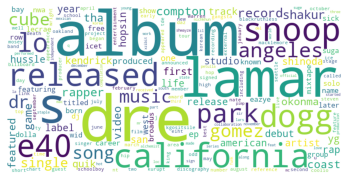

In [41]:
plt.imshow(wordcloud_west)
plt.axis("off")
plt.show()

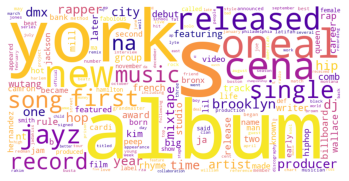

In [42]:
plt.imshow(wordcloud_east)
plt.axis("off")
plt.show()

**💬 Comment**: I find that the resulting word clouds make sense. The West Coast word cloud prominently features key figures from the West Coast hip-hop scene, while conversely, the East Coast word cloud does the same for its own scene. However, both include universal terms such as 'album,' which lack regional specificity. Ideally, the word clouds would exclusively contain terms that are pertinent to their respective coasts. This suggests that the TF-TR method may not be the most effective for distinguishing between coast-specific and non-coast-specific terms.

> - For each coast, what are the 5 words with the highest TR scores? Comment on your result.

✅**Solution**: Define a function to compute TR dictionaries. The function aggregates tokens from both frequency distributions into a set and calculates the TR for each token. It stores the calculated TR in a dictionary and returns this dictionary.

In [43]:
def compute_tr(fdist1, fdist2, c):
    tr = {}
    
    all_tokens = set(list(fdist1.keys()) + list(fdist2.keys()))

    for token in all_tokens:
        tf1 = fdist1.get(token, 0)
        tf2 = fdist2.get(token, 0)
        
        if tf1 > 0:
            w1 = tf1 / (tf2 + c)
            tr[token] = w1

    return tr

✅**Solution**: Generate TR dictionaries for West and East Coast texts.

In [44]:
tr_west = compute_tr(tf_west, tf_east, 20)
tr_east = compute_tr(tf_east, tf_west, 20)

✅**Solution**: Sort and display the top five TR values for West and East Coast texts.

In [45]:
sorted(list(tr_west.items()), key=lambda x: x[1], reverse=True)[:5]

[('e40', 7.0588235294117645),
 ('gomez', 6.956521739130435),
 ('lamar', 6.230769230769231),
 ('okonma', 5.2),
 ('cube', 4.880952380952381)]

In [46]:
sorted(list(tr_east.items()), key=lambda x: x[1], reverse=True)[:5]

[('oneal', 15.875),
 ('cena', 13.451612903225806),
 ('dmx', 8.884615384615385),
 ('brooklyn', 8.875),
 ('wallace', 7.730769230769231)]

**💬 Comment**: I find that the resulting lists make sense. On the West Coast, 'Gomez' could reflect the area's larger Hispanic population. 'Lamar,' 'Okonma,' and 'Cube' likely refer to major hip-hop artists Kendrick Lamar, Tyler, the Creator, and Ice Cube—all from California. I can't think of a reason why 'Shinoda' is included, as Mike Shinoda is not typically associated with hip-hop music.

The East Coast list is less straightforward. 'DMX' and 'Wallace' likely refer to major hip-hop artists DMX and The Notorious B.I.G. (Christopher Wallace)—both from New York. 'Brooklyn' of course refers to one of the five major boroughs of New York City and has historically been a key cultural hub for hip-hop music. I can't think of a reason why either 'Neal' and 'Cena' are included. Perhaps these are common East Coast surnames.

> ## 3. Communities <a class="anchor" id="communities"></a>
> Find communities and their modularity. Here's what you need to do:
> - In your own words, explain what the measure "modularity" is, and the intuition behind the formula you use to compute it. 

**💬 Comment**: Network modularity indicates how well a network is divided into communities. High modularity suggests that the network separates effectively into distinct communities, whereas low modularity suggests the opposite.

> - Find communities in the network

✅**Solution**: Import necessary modules and libraries.

In [47]:
import networkx as nx
import matplotlib.pyplot as plt

✅**Solution**: Read NetworkX graph file from directory.

In [54]:
G = pkl.load(open('../lectures/rapper_network.pkl', 'rb')).to_undirected()

#G = nx.read_graphml("/Users/oskarhibbert/Library/Mobile Documents/com~apple~CloudDocs/Documents/Studies/MSc Sem 1/02805 Social Graphs and Interactions/Week 4/G_w4.graphml").to_undirected()

✅**Solution**: Isolate the giant component in the hip-hop artists network by removing all nodes that are not part of it.

In [55]:
connected_components_G = nx.connected_components(G)
largest_cc_G = max(connected_components_G, key=len)
nodes_to_remove = set(G.nodes()) - set(largest_cc_G)

G.remove_nodes_from(nodes_to_remove)

✅**Solution**: Define a function to compute the modularity of a NetworkX graph given its community structure.

In [56]:
def compute_modularity(G, communities):
    m = G.number_of_edges()
    modularity = 0
    
    for community in communities:
        for i in community:
            for j in community:
                Aij = 1 if G.has_edge(i, j) else 0
                ki = G.degree[i]
                kj = G.degree[j]
                modularity += Aij - (ki * kj) / (2 * m)
    
    return modularity / (2 * m)

✅**Solution**: Define a function to perform clustering on a NetworkX graph until *n* disjoint clusters are formed. The function uses edge betweenness centrality to identify and remove the most central edges in the graph, thereby increasing the number of clusters.

In [57]:
def clustering(G, n, verbose=False):
    current_clusters = nx.number_connected_components(G)

    while current_clusters < n:
        edge_betweenness = nx.edge_betweenness_centrality(G).items()
        edge_to_remove = sorted(edge_betweenness, key=lambda pair: -pair[1])[0][0]

        G.remove_edge(*edge_to_remove)
        
        current_clusters = nx.number_connected_components(G)

        if verbose:
            print(f"Deleted edge: {edge_to_remove}, current clusters: {current_clusters}")
    
    if verbose:
        node_colors = []

        for _, attributes in G.nodes(data=True):
            if attributes['coast'] == "W":
                node_colors.append('red')
            if attributes['coast'] == "E":
                node_colors.append('blue')
        
        node_degrees = [G.degree[node] for node in G]

        plt.figure(figsize=(10, 6))
        nx.draw(G, node_size=node_degrees, node_color=node_colors, width=0.5, edge_color="lightgray")
        plt.show()

    communities = [list(c) for c in nx.connected_components(G)]
    modularity = compute_modularity(G, communities)
    
    return communities, modularity

✅**Solution**: Perform clustering on the hip-hop artists network.

Deleted edge: ('Madlib', 'Jay-Z'), current clusters: 1
Deleted edge: ('Macklemore', 'Nas'), current clusters: 1
Deleted edge: ('KRS-One', 'Nas'), current clusters: 1
Deleted edge: ('Nas', 'RZA'), current clusters: 1
Deleted edge: ('Kreayshawn', 'Cool Nutz'), current clusters: 2
Deleted edge: ('Macklemore', 'Le1f'), current clusters: 3
Deleted edge: ('Ice-T', 'Jay-Z'), current clusters: 3
Deleted edge: ('Kendrick Lamar', 'Madlib'), current clusters: 3
Deleted edge: ('Lecrae', 'Nas'), current clusters: 3
Deleted edge: ('Aceyalone', 'Macklemore'), current clusters: 3
Deleted edge: ('Aceyalone', 'El-P'), current clusters: 3
Deleted edge: ('Dumbfoundead', 'Too Short'), current clusters: 3
Deleted edge: ('Dumbfoundead', 'Jay Park'), current clusters: 3
Deleted edge: ('Grieves', 'Macklemore'), current clusters: 3
Deleted edge: ('The D.O.C.', 'Ceschi'), current clusters: 3
Deleted edge: ('Ceschi', 'Eyenine'), current clusters: 3
Deleted edge: ('Madlib', 'Samuel T. Herring'), current clusters: 

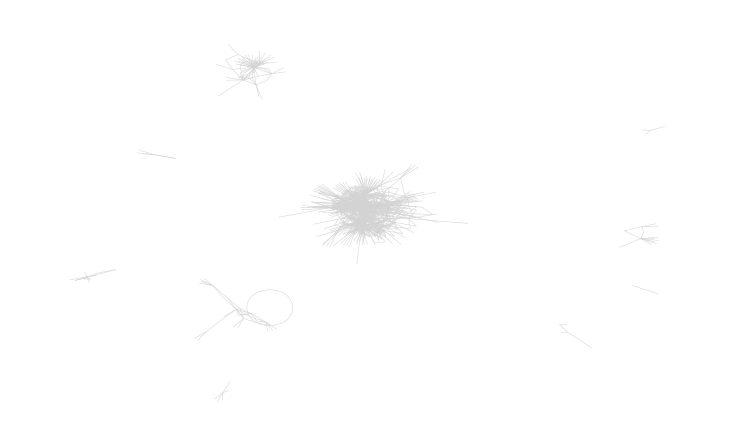

In [58]:
communities_G, modularity_G = clustering(G, 10, True)

> - Explain how you chose to identify the communities: Which algorithm did you use and how does it work?

**💬 Comment**: I chose to use the Girvan-Newman community detection algorithm to systematically remove edges from the graph in order to isolate distinct communities within the network as disjoint clusters. The algorithm works by iteratively removing the edge in the network with the highest betweenness centrality score. A high betweenness centrality score indicates that the edge serves as a "bridge" between two disparate parts of the network. This process repeats until the network has been divided into *n* disjoint clusters.

> - Comment on your results:
>     - How many communities did you find in total?

**💬 Comment**: Playing around with the above implementation, it becomes clear there are two major communities in the hip-hop artists network: West and East Coast hip-hop artists.

> - Compute the value of modularity with the partition created by the algorithm.

In [59]:
modularity_G

0.28247042996430893

> - Plot and/or print the distribution of community sizes (whichever makes most sense). Comment on your result.

✅**Solution**: Sort and display the community sizes.

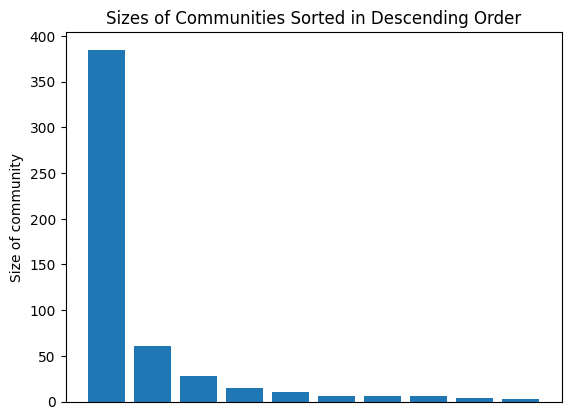

In [60]:
community_sizes = sorted([len(community) for community in communities_G], reverse=True)
plt.style.use('default')
plt.bar(range(len(community_sizes)), community_sizes)
plt.title('Sizes of Communities Sorted in Descending Order')
plt.ylabel('Size of community')
plt.xticks([])
plt.show()

**💬 Comment**: I believe that my original hip-hop artists network is incorrect because the network doesn't appear to contain all the true connections between West and East Coast hip-hop artists. As a result, the identified communities are incredibly distinct.

> Now, partition your rappers into two communities based on which coast they represent.
>   - What is the modularity of this partition? Comment on the result.

✅**Solution**: Read NetworkX graph file from directory.

In [65]:
G = pkl.load(open('../lectures/rapper_network.pkl', 'rb')).to_undirected()

#G = nx.read_graphml("/Users/oskarhibbert/Library/Mobile Documents/com~apple~CloudDocs/Documents/Studies/MSc Sem 1/02805 Social Graphs and Interactions/Week 4/G_w4.graphml").to_undirected()

✅**Solution**: Separate West and East Coast nodes based on their 'coast' node property.

In [68]:
G.nodes(data=True)

NodeDataView({'24kGoldn': {'coast': 'West'}, '40 Glocc': {'coast': 'West'}, 'DJ A-Tron': {'coast': 'West'}, 'Ab-Soul': {'coast': 'West'}, 'Abstract Rude': {'coast': 'West'}, 'Aceyalone': {'coast': 'West'}, 'Afroman': {'coast': 'West'}, "Ak'Sent": {'coast': 'West'}, 'The Alchemist (musician)': {'coast': 'West'}, 'B-Legit': {'coast': 'West'}, 'B-Real': {'coast': 'West'}, 'B.G. Knocc Out': {'coast': 'West'}, 'Show Banga': {'coast': 'West'}, 'Ant Banks': {'coast': 'West'}, 'Sho Baraka': {'coast': 'West'}, 'Becky G': {'coast': 'West'}, 'Berner (rapper)': {'coast': 'West'}, 'Big B (rapper)': {'coast': 'West'}, 'Big Dave (rapper)': {'coast': 'West'}, 'Bizzle': {'coast': 'West'}, 'Blueface': {'coast': 'West'}, 'Blxst': {'coast': 'West'}, 'Buddy (rapper)': {'coast': 'West'}, 'Busdriver': {'coast': 'West'}, 'Sway Calloway': {'coast': 'West'}, 'Clyde Carson': {'coast': 'West'}, 'Celestaphone': {'coast': 'West'}, 'Tha Chill': {'coast': 'West'}, 'Shawn Chrystopher': {'coast': 'West'}, 'Chanel West 

In [69]:
west_nodes = [n for n, attr in G.nodes(data=True) if attr['coast'] == 'West']
east_nodes = [n for n, attr in G.nodes(data=True) if attr['coast'] == 'East']

✅**Solution**: Compute the modularity between West and East Coast hip-hop artists in the hip-hop artists network.

In [70]:
nx.community.modularity(G, [west_nodes, east_nodes])

0.2730991571562356

**💬 Comment**: The hip-hop artists network has a positive modularity value, suggesting that it is well partitioned into communities.

> ## 4. Sentiment of communities <a class="anchor" id="sentiment"></a>
>
> Analyze the sentiment of communities.
>
> Here's what you need to do (use the LabMIT wordlist approach):
>
> - Calculate and store sentiment for every rapper

✅**Solution**: Extracting words and sentiment scores from the data into a dictionary

In [ ]:
word_sentiment_dict = {}
with open("../lectures/dataset_s1.txt", "r") as file:
    lines = file.readlines()

# Skipping the header line
for line in lines[1:]:  
    
    # Reading separate columns split by tab character
    tokens = line.split("\t")

    # Reading the word and corresponding sentiment score into the dict
    word = tokens[0]
    sentiment = float(tokens[2])
    word_sentiment_dict[word] = sentiment

✅**Solution**: 

In [ ]:
# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Get sentiment of a text. I use FreqDist for speeding it up
def get_sentiment_for_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Filter out stopwords and non-alphabetic tokens
    filtered_tokens = [token for token in tokens if token.isalpha() and token not in stopwords.words('english')]
    
    # Lemmatize and lowercase tokens
    lemmatized_tokens = [lemmatizer.lemmatize(token.lower()) for token in filtered_tokens]
    
    # Create a frequency distribution of tokens
    freq_dist = FreqDist(lemmatized_tokens)
    
    total_sentiment = 0
    total_weight = 0
    
    # For each unique token, find its sentiment and then its weighted contribution
    for token, freq in freq_dist.items():
        if token in word_sentiment_dict:
            total_sentiment += word_sentiment_dict[token] * freq  # Multiply by frequency for weighting
            total_weight += freq
    
    # Return the weighted average sentiment if total_weight is not zero; otherwise, return None
    return total_sentiment / total_weight if total_weight != 0 else None

> * Iterate over the nodes in your network, tokenize each page, and calculate sentiment every single page. Now you have sentiment as a new nodal property. 

In [ ]:
# ../rappers_text was created in week 6 

# Calculate and store sentiment for every tokenized rapper page

# Get each rapper file by the rapper name
# URL of the CSV file
rappers_url = 'https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2023/main/files/Rappers.csv'

# Reading the CSV file into a pandas DataFrame
df_rappers = pd.read_csv(rappers_url)
rapper_file_root = 'rappers_text/'
file_list = [f"{re.sub(r'[^a-zA-Z0-9_]', '_', rapper_name)}.txt" for rapper_name in df_rappers['WikipediaPageName']]

# Dictionary to store sentiment values for each rapper
rapper_sentiments = {}
# Iterate over each file and calculate sentiment
for rapper_file_name in file_list:
    with open(os.path.join(rapper_file_root, rapper_file_name), 'r', encoding='utf-8') as file:
        # Read file text to a string
        content = file.read()
        # Calculate the sentiment for the file text
        sentiment = get_sentiment_for_text(content)
        
        rapper_sentiments[rapper_file_name] = sentiment

# Checking the first few sentiment values
list(rapper_sentiments.items())[:5]

[('6ix9ine.txt', 5.455729001584785),
 ('9th_Prince.txt', 5.457936507936509),
 ('22Gz.txt', 5.545100000000002),
 ('38_Spesh.txt', 5.690217391304348),
 ('The_45_King.txt', 5.619158751696067)]

In [ ]:
# Loop through network and add sentiment as nodal property

# Importing the Graph saved in Week 4's exercises
rapper_network = pkl.load(open('rapper_network.pkl', 'rb'))
rapper_network_with_sentiment = rapper_network.copy()

def add_sentiment_to_nodes(network, file_list):
    for node in network.nodes():
        # Generate filename from the node
        filename = f"{re.sub(r'[^a-zA-Z0-9_]', '_', node)}.txt"
        
        # Check if the file for the rapper exists in the list
        if filename in file_list:
            filepath = os.path.join(rapper_file_root, filename)
            
            try:
                with open(filepath, 'r', encoding='utf-8') as file:
                    content = file.read()

                    # Check if the content is empty
                    if not content.strip():
                        print(f"File {filepath} is empty.")
                        # subsequent code will be skipped for that iteration
                        continue

                    sentiment = get_sentiment_for_text(content)
                    if sentiment is not None:
                        network.nodes[node]['sentiment'] = sentiment
            except FileNotFoundError:
                print(f"File {filepath} not found.")
                continue
        else:
            print(f"File name {filename} not present in file list.")

# Just call the function. Do not reassign the result.
add_sentiment_to_nodes(rapper_network_with_sentiment, file_list)

# Now, this will work
print(rapper_network_with_sentiment.nodes(data=True))

File rappers_text/G_Nut.txt is empty.
File rappers_text/G_Stack.txt is empty.
File rappers_text/Mugzi.txt is empty.
File rappers_text/Stressmatic.txt is empty.
File rappers_text/V_White.txt is empty.
[('24kGoldn', {'coast': 'West', 'sentiment': 5.906948640483387}), ('40 Glocc', {'coast': 'West', 'sentiment': 5.444404536862013}), ('DJ A-Tron', {'coast': 'West', 'sentiment': 5.966887755102039}), ('Ab-Soul', {'coast': 'West', 'sentiment': 5.737441509433963}), ('Abstract Rude', {'coast': 'West', 'sentiment': 5.624358353510892}), ('Aceyalone', {'coast': 'West', 'sentiment': 5.585031446540881}), ('Afroman', {'coast': 'West', 'sentiment': 5.714676007005252}), ("Ak'Sent", {'coast': 'West', 'sentiment': 5.792477064220183}), ('The Alchemist (musician)', {'coast': 'West', 'sentiment': 5.71089201877934}), ('B-Legit', {'coast': 'West', 'sentiment': 5.508348017621147}), ('B-Real', {'coast': 'West', 'sentiment': 5.5946166394779775}), ('B.G. Knocc Out', {'coast': 'West', 'sentiment': 5.740735294117645

> - # Create a histogram of all rappers' associated sentiments.

> - # What are the 10 rappers with happiest and saddest pages?

> # Now, compute the sentiment of each coast: 
> - Which is the happiest and which is saddest coast according to the LabMT wordlist approach? (Take the coast's sentiment to be the average sentiment of the coast's rappers' pages (disregarding any rappers with sentiment 0).

> - # Use the "label shuffling test" to test if the coast with the highest wikipedia page sentiment has a page sentiment that is significantly higher (5% confidence bound) than a randomly selected group of rappers of the same size.

> - # Does the result make sense to you? Elaborate.

> # A couple of additional instructions you will need below:
> - Average the average sentiment of the nodes in each community to find a community-level sentiment.

## 5. References <a class="anchor" id="references"></a>

[1] Dodds, Peter Sheridan, et al. "Temporal patterns of happiness and information in a global social network: Hedonometrics and Twitter." PloS one 6.12 (2011): e26752. [Temporal Patterns of Happiness and Information in a Global Social Network: Hedonometrics and Twitter](http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0026752)

[2] Longhurst, J. W. S., D. Rayfield, and D. E. Conlan. 1994. "The Impacts Of Road Transport On Urban Air Quality-A Case Study Of The Greater Manchester Region." WIT Transactions on Ecology and the Environment 3.
